In [2]:
import ptc_twiss.madx_configuration as twiss_configuration_gen
import ptc_twiss.optical_functions as twiss_optics_parameters
import ptc_twiss.transporter as twiss_transport
import ptc_track.madx_configuration as track_configuration_gen
import ptc_track.optical_functions as track_optics_parameters
import ptc_track.transporter as track_transport
import approximator.transporter as ptg
import approximator.runner as aproximator_runner
import approximator.optical_functions as approximator_optics_parameters
import visualization.optics_parameter_visualisation as plotter
import data.grid_configuration as buc
import data.particles_generator as pg
import os
import matplotlib.pyplot as plt
import seaborn as sns
from data.parameters_names import ParametersNames as Parameters

Welcome to JupyROOT 6.18/02


In [3]:
sns.set_style("whitegrid")

Change below path for path to unziped folder

In [22]:
path_to_project = "/home/rafalmucha/Pobrane/optic"
folder_name = "2017_matched"
script_file_name = "ptc_twiss_script.madx"
xml_file_name = "configuration_reco_beam1.xml"
serialized_approximator_file_name = "parametrization_6500GeV_0p4_140.root"
approximator_name = "ip5_to_station_220_h_2_lhcb1"

name_of_folder_with_sources = "optics_generator_python"

In [23]:
s = 219.55
item_number = 2
path_to_xml_file = os.path.join(path_to_project, folder_name, xml_file_name)
twiss_configuration = twiss_configuration_gen.TwissConfiguration.get_configuration_from_file(path_to_xml_file, item_number, s)
twiss_transporter = twiss_transport.get_transporter(twiss_configuration)

In [24]:
path_to_configuration = os.path.join(path_to_project, folder_name)
path_to_xml_file = os.path.join(path_to_project, folder_name, xml_file_name)
item_number = 2
track_configuration = track_configuration_gen.TrackConfiguration(path_to_xml_file, item_number, path_to_configuration)
track_transporter = track_transport.get_transporter(track_configuration)

In [25]:
path_to_sources = os.path.join(path_to_project, name_of_folder_with_sources)
path_to_approximator = os.path.join(path_to_project, folder_name, serialized_approximator_file_name)
approximator = aproximator_runner.get_approximator(path_to_sources, path_to_approximator, approximator_name)
transporter = ptg.get_transporter(approximator)

In [26]:
x_mean = 0
sigma_x = 0
theta_x_mean = 190e-6
sigma_theta_x = 0
y_mean = 0
sigma_y = 0
theta_y_mean = 0
sigma_theta_y = 0
pt_mean = -0.1
sigma_pt = 0.1

x_resolution = 1
theta_x_resolution = 1
y_resolution = 1
theta_y_resolution = 1
pt_resolution = 11

grid_configuration_120 = buc.GridConfiguration.from_sigma(x_mean, sigma_x, x_resolution,
                                                       theta_x_mean, sigma_theta_x, theta_x_resolution,
                                                       y_mean, sigma_y, y_resolution,
                                                       theta_y_mean, sigma_theta_y, theta_y_resolution,
                                                        pt_mean, sigma_pt, pt_resolution)
grid_120_name = r"$\theta_x = 120\mu$rad "
particles = pg.generate_from_range(grid_configuration_120)

In [27]:
title_sufix = "2017_nominal; " + r"$\theta_x$=XA; $\xi$=0"
transporter1 = "ptc_twiss; madx 5.05.02"
transporter2_name = "ptc_track"
transporter3_name = "approximator"

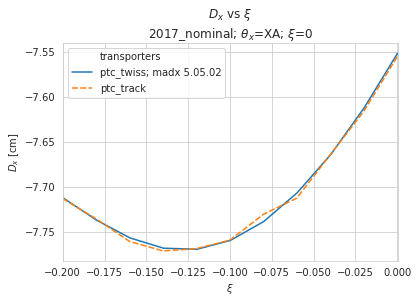

In [28]:
optical_functions = {
    transporter1: (twiss_optics_parameters.compute_d_x, twiss_configuration),
    transporter2_name: (track_optics_parameters.compute_d_x, track_transporter),
#     transporter3_name: (approximator_optics_parameters.compute_d_x, transporter)
}

axes = plotter.plot_optical_functions(particles, optical_functions, Parameters.PT, Parameters.D_X, title_sufix)
# axes.set_ylim(-10.25, -8.25)
# axes.set_xticks(range(0, 151, 30))

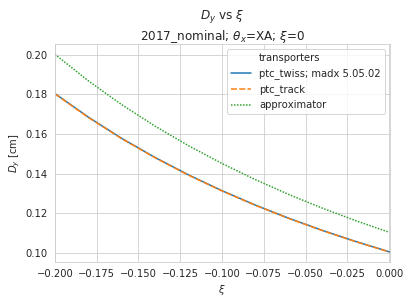

In [29]:
optical_functions = {
    transporter1: (twiss_optics_parameters.compute_d_y, twiss_configuration),
    transporter2_name: (track_optics_parameters.compute_d_y, track_transporter),
    transporter3_name: (approximator_optics_parameters.compute_d_y, transporter)
}

axes = plotter.plot_optical_functions(particles, optical_functions, Parameters.PT, Parameters.D_Y, title_sufix)

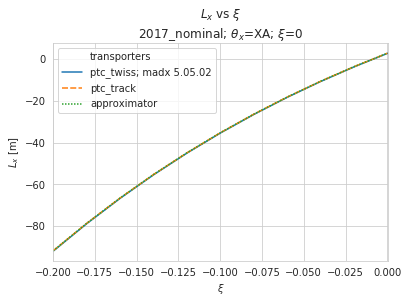

In [30]:
optical_functions = {
    transporter1: (twiss_optics_parameters.compute_l_x, twiss_configuration),
    transporter2_name: (track_optics_parameters.compute_l_x, track_transporter),
    transporter3_name: (approximator_optics_parameters.compute_l_x, transporter)
}

axes = plotter.plot_optical_functions(particles, optical_functions, Parameters.PT, Parameters.L_X, title_sufix)

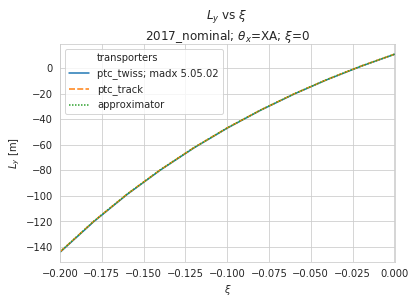

In [31]:
optical_functions = {
    transporter1: (twiss_optics_parameters.compute_l_y, twiss_configuration),
    transporter2_name: (track_optics_parameters.compute_l_y, track_transporter),
    transporter3_name: (approximator_optics_parameters.compute_l_y, transporter)
}

axes = plotter.plot_optical_functions(particles, optical_functions, Parameters.PT, Parameters.L_Y, title_sufix)

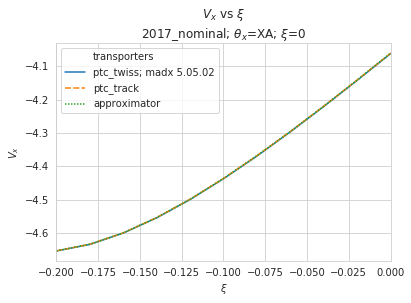

In [32]:
optical_functions = {
    transporter1: (twiss_optics_parameters.compute_v_x, twiss_configuration),
    transporter2_name: (track_optics_parameters.compute_v_x, track_transporter),
    transporter3_name: (approximator_optics_parameters.compute_v_x, transporter)
}

axes = plotter.plot_optical_functions(particles, optical_functions, Parameters.PT, Parameters.V_X, title_sufix)

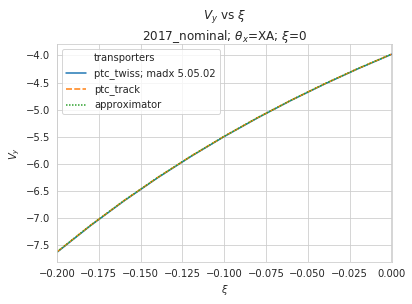

In [33]:
optical_functions = {
    transporter1: (twiss_optics_parameters.compute_v_y, twiss_configuration),
    transporter2_name: (track_optics_parameters.compute_v_y, track_transporter),
    transporter3_name: (approximator_optics_parameters.compute_v_y, transporter)
}

axes = plotter.plot_optical_functions(particles, optical_functions, Parameters.PT, Parameters.V_Y, title_sufix)